In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5)

In [8]:
# Load dataset
flower_data = datasets.load_iris()

# Explore flower_data
# As data_field is just a dictionary, we can do .keys to retrieve all keys
data_field = flower_data.keys()   # dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

# print(len(flower_data.data))
# print(flower_data.feature_names)

# This data does not come in a friendly way, so we have to convert it to a dataframe for analysis.

flower_df = pd.DataFrame(data=flower_data.data, columns=flower_data.feature_names)
flower_df.head() # A friendly formated data.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
# for a machine learning project, we always want a ground truth: target. flower_data.target
flower_df['species'] = flower_data.target
flower_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
# Let get statistical measures of the data.
df = flower_df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]] # To get portion of a dataframe, you can use [[]] with 
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


0    50
1    50
2    50
Name: species, dtype: int64


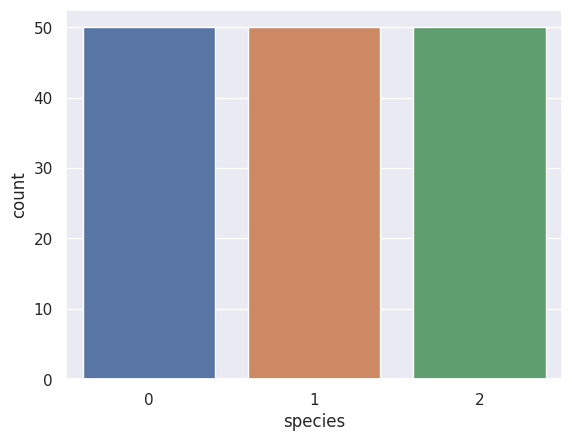

In [32]:
print(flower_df["species"].value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='species', data=flower_df)